In [52]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [53]:
pip show opencv-python


Name: opencv-python
Version: 4.10.0.84
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\shafe\anaconda3\lib\site-packages
Requires: numpy, numpy, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install opencv-contrib-python


Note: you may need to restart the kernel to use updated packages.


In [56]:
import cv2
print(cv2.__version__)


4.10.0


In [57]:
pip install requests beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [58]:
import os
import requests
from bs4 import BeautifulSoup

# Function to download an image
def download_image(image_url, save_folder, image_name):
    try:
        response = requests.get(image_url, stream=True)
        if response.status_code == 200:
            with open(os.path.join(save_folder, image_name), 'wb') as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            print(f"Downloaded: {image_name}")
        else:
            print(f"Failed to download: {image_url}")
    except Exception as e:
        print(f"Error downloading {image_url}: {e}")

# Function to scrape actor images
def scrape_actor_images(url, save_folder):
    # Make request to the website
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to access {url}")
        return

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Create folder to save images
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    # Find image elements (specific to Wikipedia or other sites)
    for idx, img_tag in enumerate(soup.find_all('img'), start=1):
        img_url = img_tag.get('src')  # Get the image source
        if img_url and img_url.startswith('//'):  # Handle Wikipedia-style URLs
            img_url = 'https:' + img_url

        if img_url.endswith(('jpg', 'jpeg', 'png')):  # Check for valid image formats
            image_name = f"actor_{idx}.jpg"
            download_image(img_url, save_folder, image_name)

# Specify the webpage URL and folder to save images
website_url = "https://en.wikipedia.org/wiki/List_of_Malayalam_film_actors"  # Replace with actual URL
output_folder = "malayalam_actors_images"

# Scrape and download images
scrape_actor_images(website_url, output_folder)


Error downloading /static/images/icons/wikipedia.png: Invalid URL '/static/images/icons/wikipedia.png': No scheme supplied. Perhaps you meant http:///static/images/icons/wikipedia.png?
Failed to download: https://upload.wikimedia.org/wikipedia/commons/thumb/8/8b/Prem_Nazir.jpg/170px-Prem_Nazir.jpg
Failed to download: https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/RAGHAVAN.jpg/170px-RAGHAVAN.jpg
Failed to download: https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Nedumudi_Venu_2008.jpg/170px-Nedumudi_Venu_2008.jpg
Failed to download: https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Mohanlal_Viswanathan_BNC.jpg/170px-Mohanlal_Viswanathan_BNC.jpg
Failed to download: https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/SOP_Mammootty2016.jpg/170px-SOP_Mammootty2016.jpg
Failed to download: https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Dileep_2008.jpg/170px-Dileep_2008.jpg
Failed to download: https://upload.wikimedia.org/wikipedia/commons/thumb/d/

# (1) Preprocessing: Detect face and eyes
When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.

In [59]:
img = cv2.imread(r'C:\Film actor classifier\model\text images\actor_17.jpg')
img.shape

(218, 170, 3)

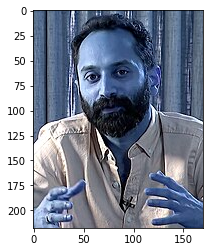

In [60]:
plt.imshow(img)

In [61]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(218, 170)

In [62]:
gray

array([[121, 117, 118, ..., 143, 119, 124],
       [118, 111, 113, ..., 128, 118, 124],
       [123, 112, 116, ..., 125, 112, 118],
       ...,
       [162, 163, 168, ...,  77,  73,  74],
       [160, 141, 167, ...,  76,  74,  71],
       [161, 146, 176, ...,  63,  61,  59]], dtype=uint8)

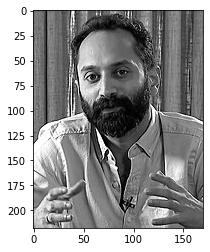

In [63]:
image=plt.imshow(gray, cmap='gray')
image

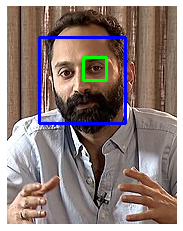

In [64]:
import cv2
import matplotlib.pyplot as plt

# Load Haar Cascade Classifiers for face and eyes
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load the image
image_path = (r'C:\Film actor classifier\model\text images\actor_17.jpg') # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    print(f"Failed to load the image from {image_path}")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces first
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    # Loop through detected faces
    for (x, y, w, h) in faces:
        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Region of interest for eyes within the detected face
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = image[y:y + h, x:x + w]

        # Detect eyes in the face region
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

    # Convert the image to RGB for matplotlib
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with detected eyes
    plt.imshow(rgb_image)
    plt.axis('off')  # Turn off the axis
    plt.show()


# (2) Preprocessing: Crop the facial region of the image

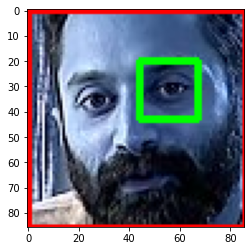

In [65]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [66]:
cropped_img = np.array(roi_color)
cropped_img.shape

(86, 86, 3)

# (3) Preprocessing: Use wavelet transform as a feature for traning our model
In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc
Wavelet transform

In [67]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

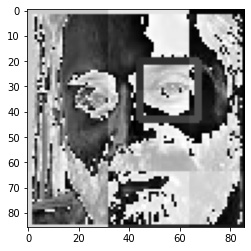

In [68]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier
# (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [69]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

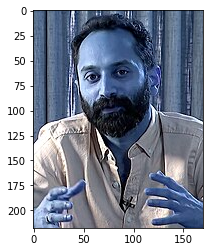

In [70]:
original_image = cv2.imread(r'C:\Film actor classifier\model\text images\actor_17.jpg')
plt.imshow(original_image)

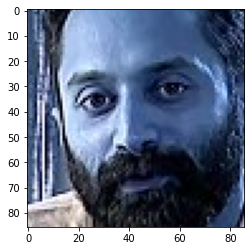

In [71]:
cropped_image = get_cropped_image_if_2_eyes(r'C:\Film actor classifier\model\text images\actor_17.jpg')
plt.imshow(cropped_image)

In below image face is not very clear and it doesn't have two eyes clearly visible

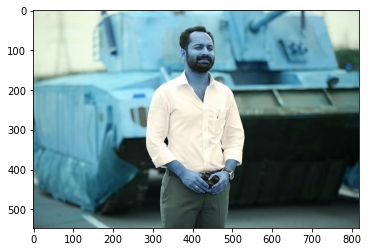

In [72]:
org_image_obstructed = cv2.imread(r"C:\Film actor classifier\model\text images\MV5BYWFiMTM5NTMtY2RjNi00MTc1LTkxMWQtM2E2ZGJkN2RjOTRiXkEyXkFqcGc@._V1_QL75_UX820_.jpg")
plt.imshow(org_image_obstructed)

In [73]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r"C:\Film actor classifier\model\text images\MV5BYWFiMTM5NTMtY2RjNi00MTc1LTkxMWQtM2E2ZGJkN2RjOTRiXkEyXkFqcGc@._V1_QL75_UX820_.jpg")
cropped_image_no_2_eyes

Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

In [74]:
path_to_data =r"C:\Film actor classifier\model\datasets"
path_to_cr_data = r"C:\Film actor classifier\model\datasets\cropped"

In [75]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [76]:
img_dirs

['C:\\Film actor classifier\\model\\datasets\\cropped',
 'C:\\Film actor classifier\\model\\datasets\\Dulquer Salmaan - Photos - IMDb_files',
 'C:\\Film actor classifier\\model\\datasets\\Fahadh Faasil - Photos - IMDb_files',
 'C:\\Film actor classifier\\model\\datasets\\Mohanlal - Photos - IMDb_files',
 'C:\\Film actor classifier\\model\\datasets\\Prem Nazir - Photos - IMDb_files',
 'C:\\Film actor classifier\\model\\datasets\\Vineeth Sreenivasan - Photos - IMDb_files']

In [77]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [78]:
import os
import cv2

cropped_image_dirs = []
actor_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    actor_name = os.path.basename(img_dir)
    print(f"Processing actor: {actor_name}")

    actor_file_names_dict[actor_name] = []

    for entry in os.scandir(img_dir):
        if entry.is_file():
            file_path = entry.path
            
            # ✅ Debugging: Check if file exists before processing
            if not os.path.exists(file_path):
                print(f"Error: File {file_path} does not exist.")
                continue

            # ✅ Read the image
            image = cv2.imread(file_path)
            
            if image is None:
                print(f"Error: Unable to read image {file_path}")
                continue

            # ✅ Process cropped images
            roi_color = get_cropped_image_if_2_eyes(file_path)
            
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cr_data, actor_name)
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print(f"Generating cropped images in folder: {cropped_folder}")

                cropped_file_name = f"{actor_name}_{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

                cv2.imwrite(cropped_file_path, roi_color)

                actor_file_names_dict[actor_name].append(cropped_file_path)
                count += 1


Processing actor: cropped
Processing actor: Dulquer Salmaan - Photos - IMDb_files
Error: Unable to read image C:\Film actor classifier\model\datasets\Dulquer Salmaan - Photos - IMDb_files\1119-14929ffb8cea22a4.js.download
Error: Unable to read image C:\Film actor classifier\model\datasets\Dulquer Salmaan - Photos - IMDb_files\11QhRZqmoxL.js.download
Error: Unable to read image C:\Film actor classifier\model\datasets\Dulquer Salmaan - Photos - IMDb_files\1361-2cfe9881ba94cba7.js.download
Error: Unable to read image C:\Film actor classifier\model\datasets\Dulquer Salmaan - Photos - IMDb_files\1389-4fb784f7e217eac2.js.download
Error: Unable to read image C:\Film actor classifier\model\datasets\Dulquer Salmaan - Photos - IMDb_files\1949-8ff9e8d34c4a4a10.js.download
Error: Unable to read image C:\Film actor classifier\model\datasets\Dulquer Salmaan - Photos - IMDb_files\208-6243d0f12c97d699.js.download
Error: Unable to read image C:\Film actor classifier\model\datasets\Dulquer Salmaan - Pho

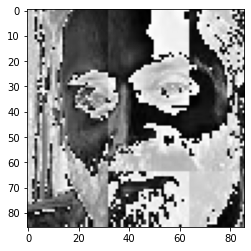

In [79]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [80]:
actor_file_names_dict

{'cropped': [],
 'Dulquer Salmaan - Photos - IMDb_files': ['C:\\Film actor classifier\\model\\datasets\\cropped\\Dulquer Salmaan - Photos - IMDb_files\\Dulquer Salmaan - Photos - IMDb_files_1.png',
  'C:\\Film actor classifier\\model\\datasets\\cropped\\Dulquer Salmaan - Photos - IMDb_files\\Dulquer Salmaan - Photos - IMDb_files_2.png',
  'C:\\Film actor classifier\\model\\datasets\\cropped\\Dulquer Salmaan - Photos - IMDb_files\\Dulquer Salmaan - Photos - IMDb_files_3.png',
  'C:\\Film actor classifier\\model\\datasets\\cropped\\Dulquer Salmaan - Photos - IMDb_files\\Dulquer Salmaan - Photos - IMDb_files_4.png',
  'C:\\Film actor classifier\\model\\datasets\\cropped\\Dulquer Salmaan - Photos - IMDb_files\\Dulquer Salmaan - Photos - IMDb_files_5.png',
  'C:\\Film actor classifier\\model\\datasets\\cropped\\Dulquer Salmaan - Photos - IMDb_files\\Dulquer Salmaan - Photos - IMDb_files_6.png',
  'C:\\Film actor classifier\\model\\datasets\\cropped\\Dulquer Salmaan - Photos - IMDb_files\\Du

In [81]:
class_dict = {}
count = 0
for actor_name in actor_file_names_dict.keys():
    class_dict[actor_name] = count
    count = count+1
class_dict

{'cropped': 0,
 'Dulquer Salmaan - Photos - IMDb_files': 1,
 'Fahadh Faasil - Photos - IMDb_files': 2,
 'Mohanlal - Photos - IMDb_files': 3,
 'Prem Nazir - Photos - IMDb_files': 4,
 'Vineeth Sreenivasan - Photos - IMDb_files': 5}

In [82]:
x = []
y = []



for actor_name, training_files in actor_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
            
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[actor_name])
        
        

In [85]:
len(x)

102

In [87]:
len(x[0])

4096

In [88]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(102, 4096)

In [89]:
x[0]

array([ 43.,  71.,  77., ..., 238.,  36., 195.])

# data cleaning done .now we can train the model

## we can use svm

In [91]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train,y_train)
pipe.score(x_test, y_test)

0.3076923076923077

In [97]:
len(x_test)

26

In [98]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           1       0.50      0.17      0.25         6
           2       0.50      0.20      0.29         5
           3       0.33      0.33      0.33         6
           4       0.00      0.00      0.00         4
           5       0.25      0.80      0.38         5

    accuracy                           0.31        26
   macro avg       0.32      0.30      0.25        26
weighted avg       0.34      0.31      0.26        26



C:\Users\shafe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shafe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shafe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# lets us use grid search cv to try different model with different parameter.Goal is to get best model

In [100]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [101]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [103]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.410000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.265000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.341667,{'logisticregression__C': 1}


In [104]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [105]:
best_estimators['svm'].score(x_test,y_test)

0.34615384615384615

In [106]:
best_estimators['random_forest'].score(x_test,y_test)

0.19230769230769232

In [107]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.3076923076923077

In [108]:
best_clf = best_estimators['svm']

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[2, 1, 0, 0, 3],
       [1, 1, 2, 0, 1],
       [0, 0, 2, 0, 4],
       [1, 0, 0, 1, 2],
       [1, 1, 0, 0, 3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

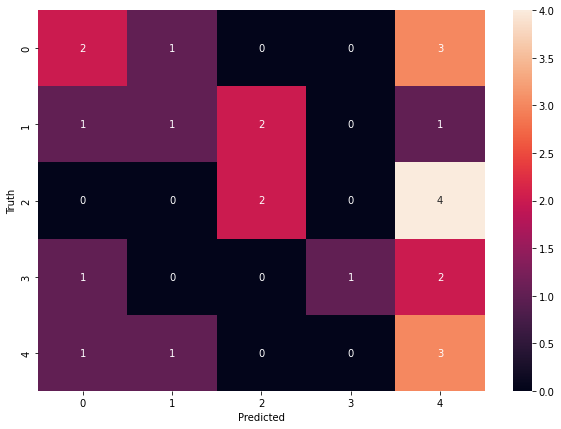

In [110]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
class_dict

# save the trained model

In [114]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# save class dictionary

In [115]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))